In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Read the data file
Linear Regression from Text with Tensorflow.ipynb <br>
data <br>
└──── birth_life_2010.txt <br>

+ birth_life_2010.txt

| Country | Birth rate | Life expectancy |
|---------|------------|-----------------|
| Vietnam | 1.822      | 74.828243902    |
| Vanuatu | 3.869      | 70.819487805    |
| ...     | ...        | ...             |


In [2]:
DATA_FILE = "./data/birth_life_2010.txt"

In [3]:
def read_birth_file_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """        
    "readline from 1 row (except 0 row : category)"
    text = open(filename, 'r').readlines()[1:]   
    "Split each line with '\t'"
    data = [line[:-1].split('\t') for line in text]
    "Select the column 1 of birth"
    births = [float(line[1]) for line in data]
    "Select the column 2 of lifes"
    lifes = [float(line[2]) for line in data]
    "Zip birth & lifes"
    data = list(zip(births, lifes))
    "The number of samples"
    n_samples = len(data)
    "Transform data type from list to np.array"
    data = np.asarray(data, dtype=np.float32)
    
    return data, n_samples

#### Step 1 : Read in data from the .txt file

In [4]:
data, n_samples = read_birth_file_data(DATA_FILE)

#### Step 2: Create placeholders for X (birth rate) and Y (life expectancy)

In [5]:
X = tf.placeholder(tf.float32, name = "X")
Y = tf.placeholder(tf.float32, name = "Y")

#### Step 3 : create weight and bias, initialized to 0

In [6]:
w = tf.get_variable("weights", initializer=tf.constant(0.0))
b = tf.get_variable("bias", initializer=tf.constant(0.0))

#### Step 4 : build model to predict Y

In [7]:
hypothesis = w * X + b

#### Step 5 : use the squared error as the loss function

In [8]:
loss = tf.reduce_mean(tf.square(Y - hypothesis, name = 'loss'))

#### Step 6 : Using gradient descent with learning rate of 0.001 to minimize loss

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

#### Stetp 7 : initialize the necessary variables, in this case, w and b
#### Stetp 8 : train the model for 100 epochs
#### Stetp 9 : output the values of w and b

see below code.

In [10]:
writer = tf.summary.FileWriter("./graphs/linear_Regression_Birth_Life", tf.get_default_graph())

In [11]:
with tf.Session() as sess:
    # Stetp 7 : initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    
    # Stetp 8 : train the model for 100 epochs
    for i in range(100):
        total_loss = 0
        for x, y in data:
            # Session execute optimizer and fetch values of loss
            _, _loss = sess.run([optimizer, loss], feed_dict = {X:x, Y:y})
            total_loss += _loss
        print("Epoch {0} : {1}".format(i, total_loss / n_samples))
    
    # close the writer when you're done using it
    writer.close()
    
    # Step 9 : output the values of w and b
    w_out, b_out = sess.run([w, b])   

Epoch 0 : 1661.8637834631543
Epoch 1 : 956.3224148609137
Epoch 2 : 844.6737023980994
Epoch 3 : 750.7312486011339
Epoch 4 : 667.6598341012079
Epoch 5 : 594.1417715627896
Epoch 6 : 529.07878103068
Epoch 7 : 471.5004191489204
Epoch 8 : 420.5458626462441
Epoch 9 : 375.45530721966765
Epoch 10 : 335.5543025185697
Epoch 11 : 300.24629857978107
Epoch 12 : 269.00376475843336
Epoch 13 : 241.35957466852116
Epoch 14 : 216.90039135300015
Epoch 15 : 195.25972298129324
Epoch 16 : 176.1137693605349
Epoch 17 : 159.17551693441837
Epoch 18 : 144.1907111125557
Epoch 19 : 130.93503488078713
Epoch 20 : 119.20935661137888
Epoch 21 : 108.8379309807855
Epoch 22 : 99.66466760624593
Epoch 23 : 91.55177013029001
Epoch 24 : 84.37664046781751
Epoch 25 : 78.03217824997724
Epoch 26 : 72.42182927812989
Epoch 27 : 67.46136239485718
Epoch 28 : 63.07566952367442
Epoch 29 : 59.19874146522856
Epoch 30 : 55.77168446383194
Epoch 31 : 52.74269822355127
Epoch 32 : 50.065632780875376
Epoch 33 : 47.70006421631674
Epoch 34 : 45.6

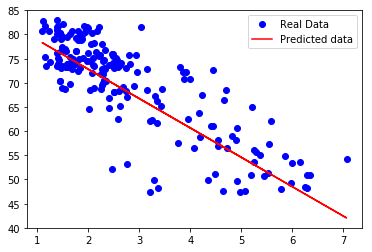

In [12]:
# plot the results
plt.plot(data[:,0], data[:,1], "bo", label = "Real Data")
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label = "Predicted data")
plt.legend()
plt.show()